In [238]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [239]:
# import csv file

df=pd.read_csv("titanic_survivor.csv")

In [240]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [241]:
print(df.shape)

(418, 12)


In [242]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_10704\1647982205.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square = True, annot = True, fmt = ".2f", center = 0, cmap = "RdYlGn")


<AxesSubplot: >

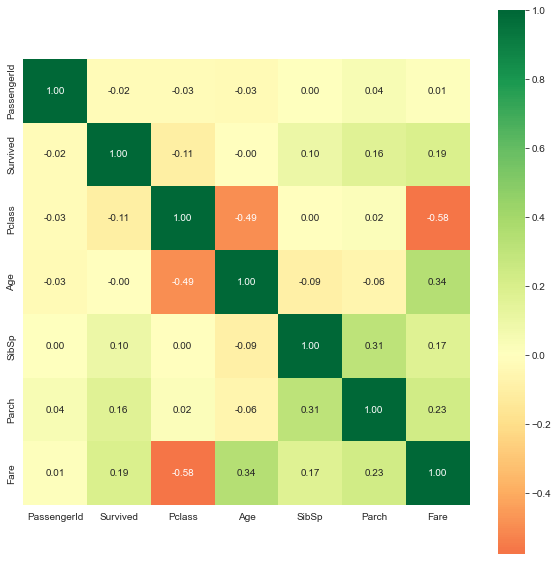

In [243]:
# correlation heatmap

plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), square = True, annot = True, fmt = ".2f", center = 0, cmap = "RdYlGn")

Note: Passenger class and Fare is more correlate to survived than other features

Data Pre-Processing

In [244]:
for x in df:
    print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [245]:
# Drop unnecessary columns

df=df.drop(["Name","Ticket"],axis=1)

In [246]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,12.2875,NaN,S


In [247]:
df.shape

(418, 10)

Handling Null Value

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [249]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [250]:
# Dropping cabin because it holds many null values.

df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot: xlabel='Age'>

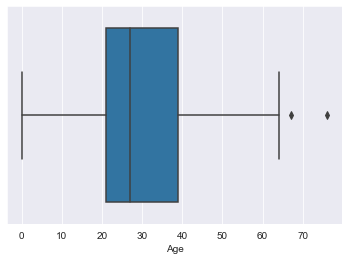

In [251]:
sns.boxplot(data=df,x="Age")

In [252]:
df["Age"].median()

27.0

In [253]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [254]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [255]:
df=df.dropna()

In [256]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [257]:
df["Survived"].dtype

dtype('int64')

In [258]:
df["Survived"].value_counts()

0    265
1    152
Name: Survived, dtype: int64

In [259]:
df.shape

(417, 9)

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_10704\802404053.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square = True, annot = True, fmt = ".2f", center = 0, cmap = "RdYlGn")


<AxesSubplot: >

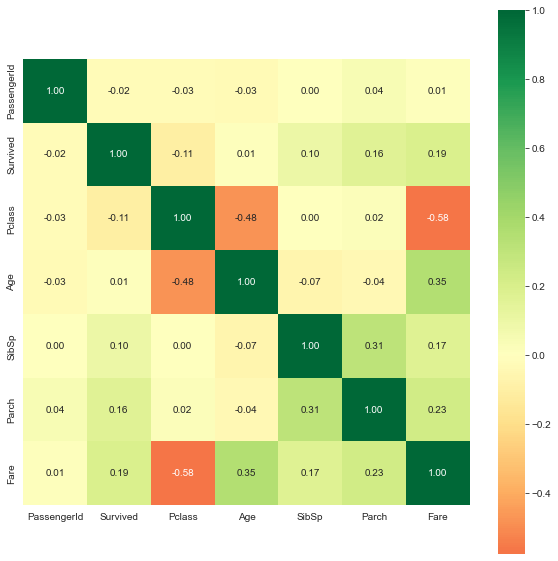

In [260]:

# correlation heatmap
# after handling missing value

plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), square = True, annot = True, fmt = ".2f", center = 0, cmap = "RdYlGn")

Note: Passenger class and Fare is more correlate to survived than other features.

In [261]:
df["Survived_or_Not"]=df["Survived"]

In [262]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_or_Not
0,892,0,3,male,34.5,0,0,7.8292,Q,0
1,893,1,3,female,47.0,1,0,7.0000,S,1
2,894,0,2,male,62.0,0,0,9.6875,Q,0
3,895,0,3,male,27.0,0,0,8.6625,S,0
4,896,1,3,female,22.0,1,1,12.2875,S,1


Survivor Count

In [263]:
df["Survived_or_Not"].replace({0:"Not Survived",1:"Survived"},inplace=True)

In [264]:
df["Survived_or_Not"].head(2)

0    Not Survived
1        Survived
Name: Survived_or_Not, dtype: object

In [265]:
df["Survived_or_Not"].value_counts()

Not Survived    265
Survived        152
Name: Survived_or_Not, dtype: int64

<AxesSubplot: xlabel='Survived_or_Not', ylabel='count'>

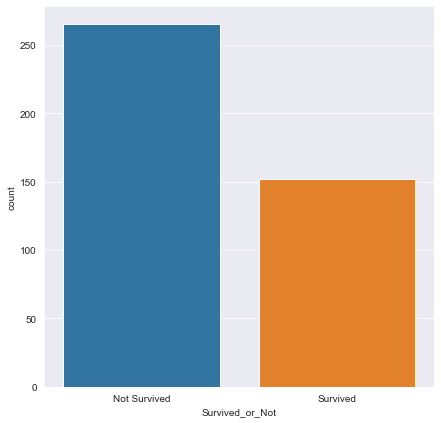

In [266]:
plt.figure(figsize=(7,7))
sns.countplot(x="Survived_or_Not",data=df)

Passenger class

In [267]:
df["Pclass"].unique()

array([3, 2, 1], dtype=int64)

In [268]:
df["Pclass"].value_counts(ascending=True)

2     93
1    107
3    217
Name: Pclass, dtype: int64

<AxesSubplot: ylabel='count'>

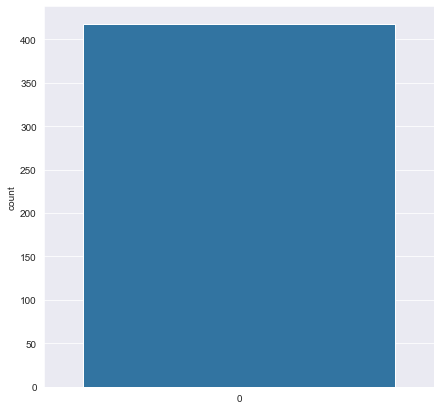

In [269]:
plt.figure(figsize=(7,7))
sns.countplot(df["Pclass"])

In [270]:
# Correlation to survived
df["Pclass"].corr(df["Survived"])

-0.10720261796407628

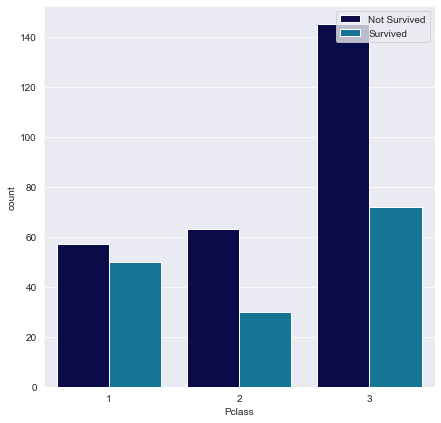

In [271]:
plt.figure(figsize=(7,7))
sns.countplot(x="Pclass",hue="Survived_or_Not",data=df,palette="ocean")
plt.legend(loc="upper right")

Sibsp

In [272]:
df["SibSp"].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [273]:
df["SibSp"].value_counts()

0    282
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

<AxesSubplot: ylabel='count'>

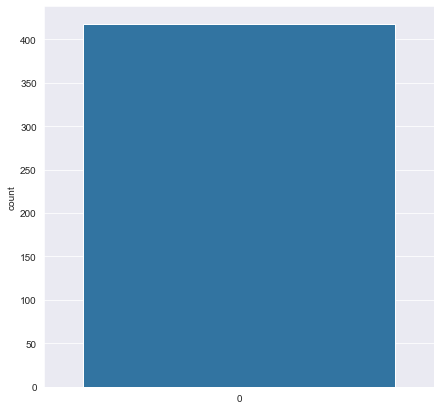

In [274]:
plt.figure(figsize=(7,7))
sns.countplot(df["SibSp"])

In [275]:
# Correlation to survived
df["SibSp"].corr(df["Survived"])

0.09913552699179767

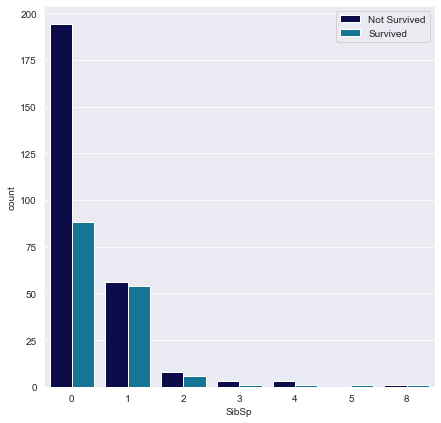

In [276]:
plt.figure(figsize=(7,7))
sns.countplot(x="SibSp",hue="Survived_or_Not",data=df,palette="ocean")
plt.legend(loc="upper right")

Parch

In [277]:
df["Parch"].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

<AxesSubplot: ylabel='count'>

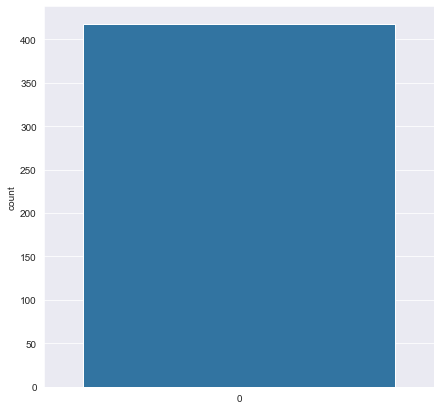

In [278]:
plt.figure(figsize=(7,7))
sns.countplot(df["Parch"])

In [279]:
df["Parch"].value_counts()

0    323
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [280]:
# Correlation to survived

df["Parch"].corr(df["Survived"])

0.1585336450930441

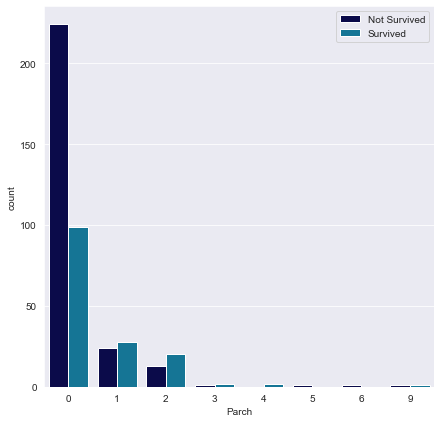

In [281]:
plt.figure(figsize=(7,7))
sns.countplot(x="Parch",hue="Survived_or_Not",data=df,palette="ocean")
plt.legend(loc="upper right")

In [282]:
df["Survived"].groupby(df["Parch"]).sum().sort_values(ascending=False)

Parch
0    99
1    28
2    20
3     2
4     2
9     1
5     0
6     0
Name: Survived, dtype: int64

Embarked

In [283]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

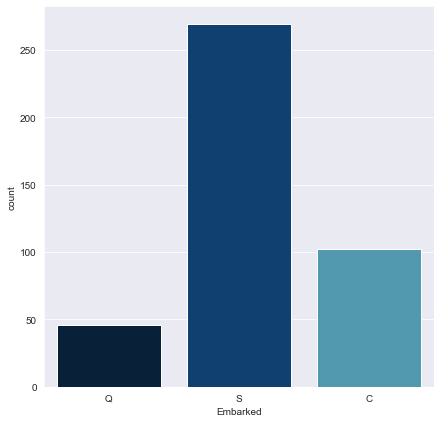

In [284]:
plt.figure(figsize=(7,7))
sns.countplot(x="Embarked",data=df,palette="ocean")

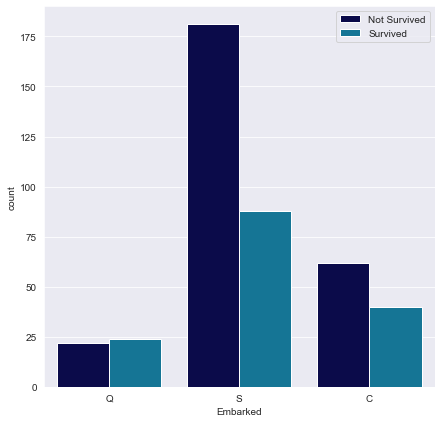

In [285]:
plt.figure(figsize=(7,7))
sns.countplot(x="Embarked",hue="Survived_or_Not",data=df,palette="ocean")
plt.legend(loc="upper right")

Sex

In [286]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [287]:
df["Sex"].value_counts()

male      265
female    152
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

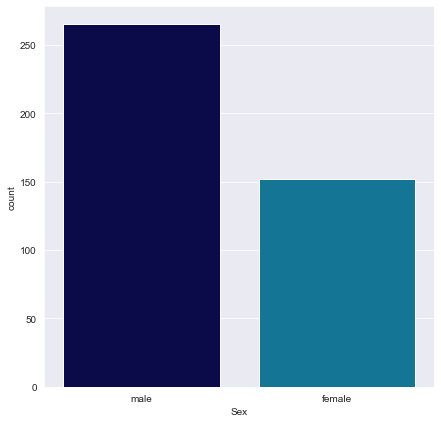

In [288]:
plt.figure(figsize=(7,7))
sns.countplot(x="Sex",data=df,palette="ocean")

In [289]:
df["Survived"].groupby(df["Sex"]).sum().sort_values(ascending=False)

Sex
female    152
male        0
Name: Survived, dtype: int64

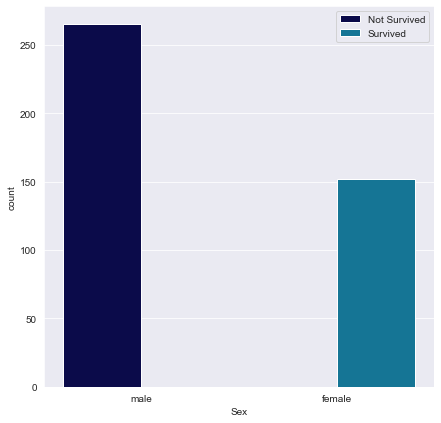

In [290]:
plt.figure(figsize=(7,7))
sns.countplot(x="Sex",hue="Survived_or_Not",data=df,palette="ocean")
plt.legend(loc="upper right")

Age

In [291]:
df["Age"].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  ,  7.  , 15.  ,
       54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  , 57.  ,
       40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17, 59.  ,
       14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

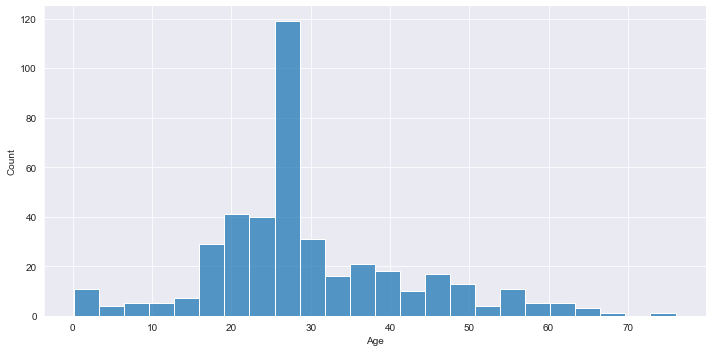

In [292]:
sns.displot(data=df, x="Age", height=5, aspect=2)

In [293]:
# Correlation to survived
df["Age"].corr(df["Survived"])

0.012547294560039664

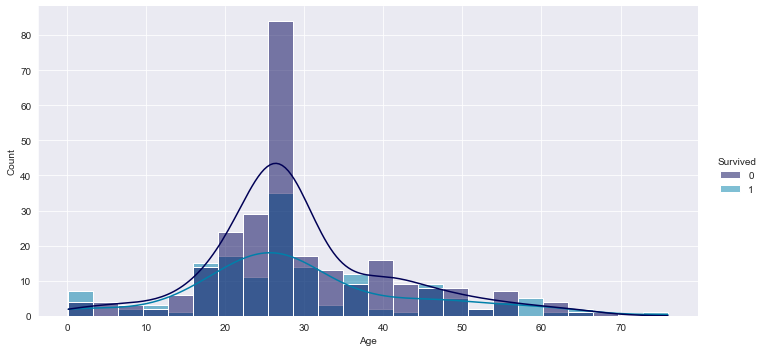

In [294]:
sns.displot(data=df, x="Age",hue="Survived",kind="hist",kde=True,palette="ocean",height=5, aspect=2)

In [295]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_or_Not
0,892,0,3,male,34.5,0,0,7.8292,Q,Not Survived
1,893,1,3,female,47.0,1,0,7.0000,S,Survived
2,894,0,2,male,62.0,0,0,9.6875,Q,Not Survived
3,895,0,3,male,27.0,0,0,8.6625,S,Not Survived
4,896,1,3,female,22.0,1,1,12.2875,S,Survived


Fare

In [296]:
df["Fare"].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [297]:
df["Fare"].mean()

35.627188489208635

In [298]:
df["Fare"].median()

14.4542

In [299]:
df["Fare"].max()

512.3292

In [300]:
df["Fare"].min()

0.0

In [301]:
df[df["Fare"]==0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_or_Not
266,1158,0,1,male,27.0,0,0,0.0,S,Not Survived
372,1264,0,1,male,49.0,0,0,0.0,S,Not Survived


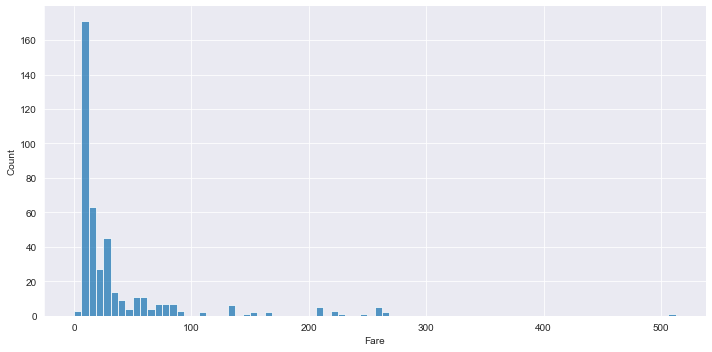

In [302]:
sns.displot(data=df, x="Fare",height=5, aspect=2)

In [303]:
df["Fare"].corr(df["Survived"])

0.19151374269353372

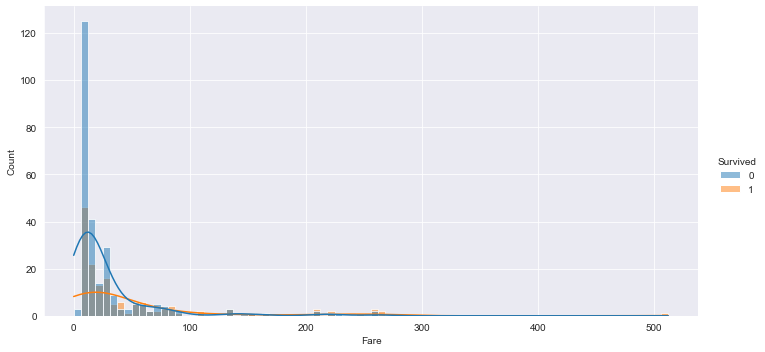

In [304]:
sns.displot(data=df, x="Fare",hue="Survived",kind="hist",kde=True,height=5, aspect=2)

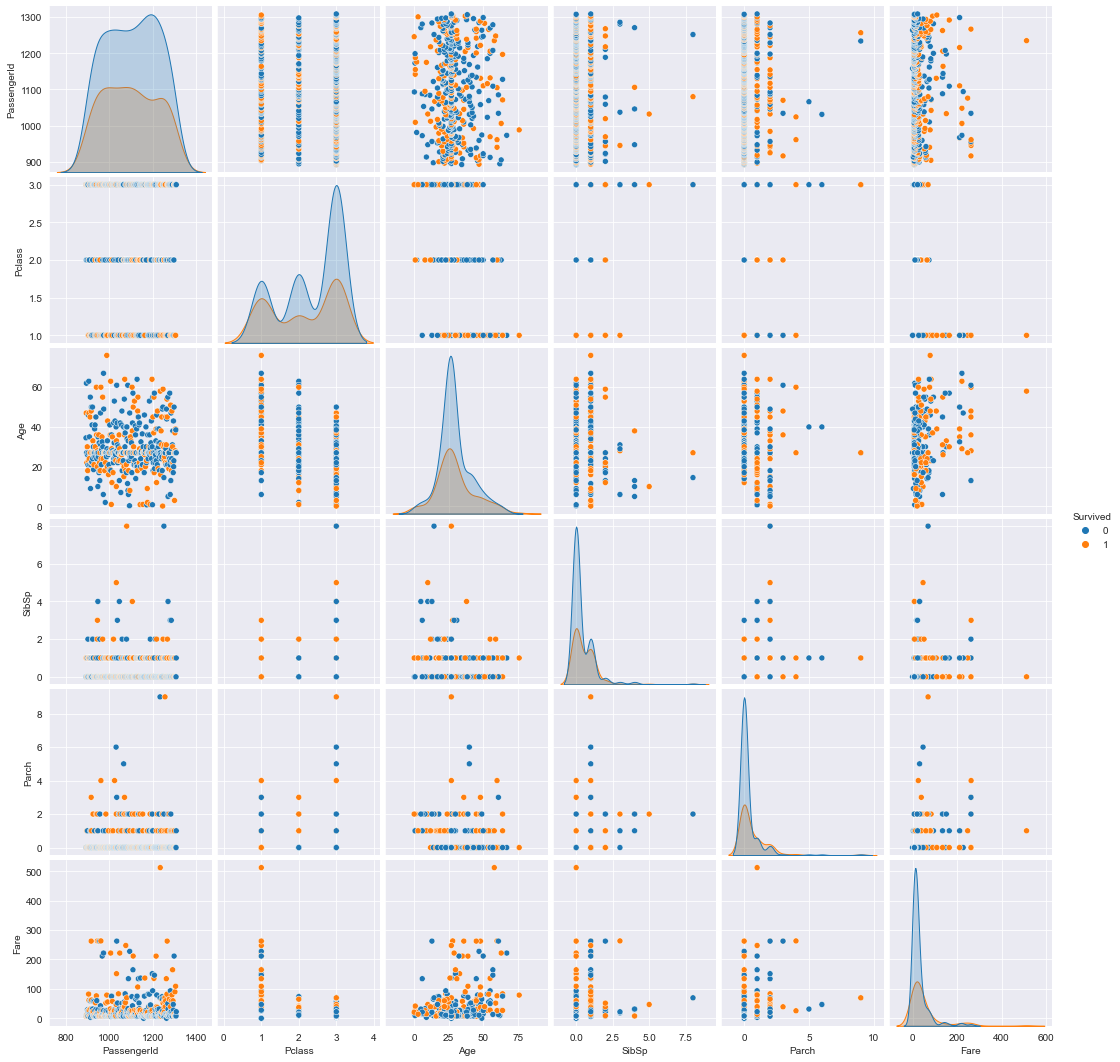

In [305]:
sns.pairplot(df,hue="Survived")

In [306]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_or_Not
0,892,0,3,male,34.5,0,0,7.8292,Q,Not Survived
1,893,1,3,female,47.0,1,0,7.0000,S,Survived
2,894,0,2,male,62.0,0,0,9.6875,Q,Not Survived


In [307]:
df.drop("Survived_or_Not",axis=1,inplace=True)

In [308]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [309]:
df["Sex"].replace({"male":1,"female":0},inplace=True)
df["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True)

In [310]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,2
1,893,1,3,0,47.0,1,0,7.0000,0
2,894,0,2,1,62.0,0,0,9.6875,2


In [311]:
# # Dividing dependent and independent variables

X = df.drop("Survived", axis=1)
y = df["Survived"]

In [312]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({0: 265, 1: 265})


In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Machine Learning

Random Forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest_model=clf.fit(X_train, y_train)
y_pred=random_forest_model.predict(X_test)

In [315]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report



In [316]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        51

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



In [317]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[55,  0],
       [ 0, 51]], dtype=int64)

<AxesSubplot: >

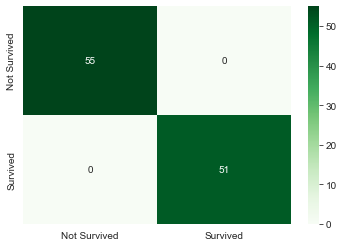

In [318]:
x_axis_labels = ["Not Survived","Survived"]
y_axis_labels =  ["Not Survived","Survived"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Decision Tree

In [319]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [320]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        51

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



<AxesSubplot: >

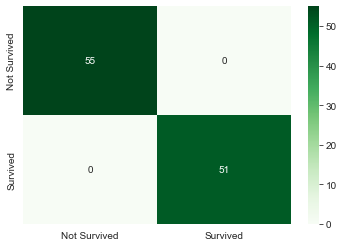

In [321]:
x_axis_labels = ["Not Survived","Survived"]
y_axis_labels =  ["Not Survived","Survived"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Logistic regression

In [322]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()
logistic_model=clf.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)

c:\Users\HP-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        51

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



<AxesSubplot: >

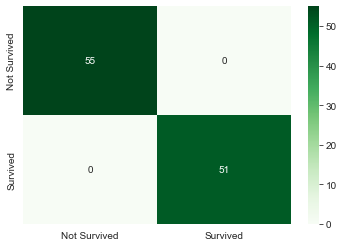

In [324]:
x_axis_labels = ["Not Survived","Survived"]
y_axis_labels =  ["Not Survived","Survived"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

KNN

In [325]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [326]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        55
           1       0.48      0.45      0.46        51

    accuracy                           0.50       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.50      0.50      0.50       106



<AxesSubplot: >

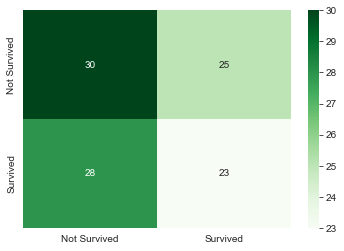

In [327]:
x_axis_labels = ["Not Survived","Survived"]
y_axis_labels =  ["Not Survived","Survived"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Xgboost

In [330]:
from xgboost import XGBClassifier


# fit model no training data
clf = XGBClassifier(
              learning_rate=0.300000012,n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             )
xgboost_model=clf.fit(X_train, y_train)

y_pred=xgboost_model.predict(X_test)

In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        51

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



<AxesSubplot: >

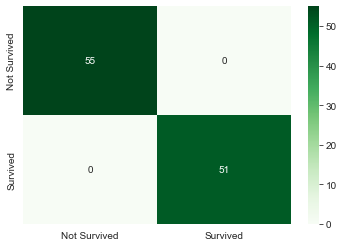

In [332]:
x_axis_labels = ["Not Survived","Survived"]
y_axis_labels =  ["Not Survived","Survived"]

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)